kosis 부산광역시 가스 사용량 2010-2020

- 년도별 도시가스/프로판 판매량 비율
    프로판 가스보다 도시가스 사용량이 점점 늘어나는가

- 년도별 도시가스, 년도별 프로판 사용량 상관도
    도시가스 사용량이 점점 많아지고 있는가
    프로판 가스 사용량은 점점 줄어들고 있는가.

- 도시가스
	년도별 겨울(10,11,12,1,2,3) 평균사용량 / 
		비겨울(4,5,6,7,8,9) 평균사용량
	-->  ttest (평균 사용량에 차이가 있는가.)

   같은 분석을, 프로판/부탄 가스를 대상으로도 실행.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.set_printoptions(precision=5, suppress=True)

raw_data=[]
with open('가스공급량_20230220145315.csv') as f:
    for line in f:
        raw_data.append(line[:-1].split(','))

t = set()
for e in raw_data:
    t.add(len(e))
print(t)

np_data = np.array(raw_data[2:])
np_data = np_data[:, 2:].astype(np.int64)
print(np_data[:3])

{8}
[[     1 179086    311   8775     64  26227]
 [     1 139496    311   8745     64  23518]
 [     1 143581    311   8092     64  23959]]


[[     12 1275714    3732   91657     768  289391]
 [     12 1297954    3492  107350     804  282017]
 [     12 1359726    3358  104294     852  268913]]


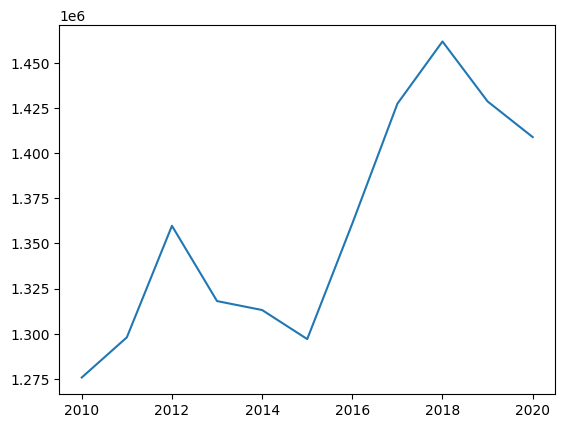

In [3]:
#print(np_data.shape)
#print(np.arange(0,130,12))
by_year = np.add.reduceat(np_data, np.arange(0,130,12))
print(by_year[:3])

total_gas = by_year[:,1] + by_year[:,3]
ln_gas = by_year[:,1]/total_gas
lp_gas = by_year[:,3]/total_gas

_, axe = plt.subplots()
axe.plot(np.arange(2010, 2021), by_year[:,1])   # 년도별 도시가스 총 사용량
#axe.plot(np.arange(2010, 2021), by_year[:,3])   # 년도별 프로판가스 총 사용량
#xe.plot(np.arange(2010, 2021), by_year[:,1]/12) # 년도별 도시가스 평균 사용량

# 년도별 도시가스+프로판 사용량 대비, 도시가스 사용량 비율
#axe.plot(np.arange(2010, 2021), ln_gas)         

#axe.plot(np.arange(2010, 2021), lp_gas)

[[1.      0.53495]
 [0.53495 1.     ]]


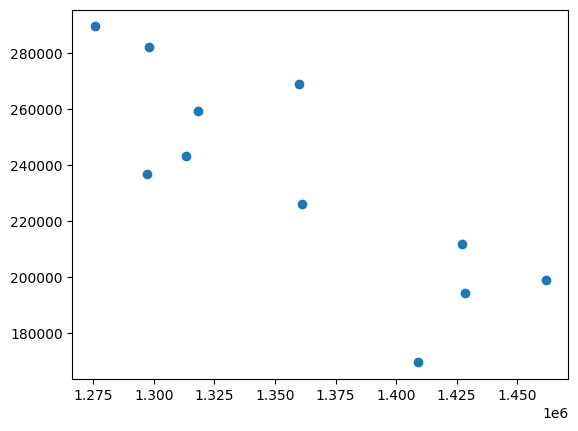

In [15]:
print(np.corrcoef(by_year[:,1], by_year[:,3]))
_, axe = plt.subplots()
# axe.scatter(by_year[:,1], by_year[:,3])
axe.scatter(by_year[:,1], by_year[:,5])

In [5]:
#print(np_data[:10])
by_season = np.add.reduceat(np_data[3:], np.arange(0, 130, 6))
print(by_season[:3])

print('*****')
summers_sum = by_season[::2]
print(summers_sum[:2])


print('*****')
winters_sum = by_season[1::2]
print(winters_sum[:2])

[[     6 461211   1866  41722    384 142333]
 [     6 843029   1806  59549    393 146533]
 [     6 462670   1746  53486    402 140882]]
*****
[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]]
*****
[[     6 843029   1806  59549    393 146533]
 [     6 840697   1711  53252    414 140133]]


In [6]:
#2010년 여름 평균 사용량
print(summers_sum[0])
print(np_data[3:9])

#2010-2011년 겨울 평균 사용량
print(winters_sum[0])
print(np_data[9:15])

[     6 461211   1866  41722    384 142333]
[[     1 114671    311   8105     64  22909]
 [     1  79649    311   7787     64  23615]
 [     1  70646    311   7137     64  22361]
 [     1  68554    311   5928     64  24491]
 [     1  65293    311   6023     64  25393]
 [     1  62398    311   6742     64  23564]]
[     6 843029   1806  59549    393 146533]
[[     1  77985    311   6366     64  23173]
 [     1 113800    311   8560     64  23772]
 [     1 160555    311   9397     64  26409]
 [     1 200683    291  12137     67  25458]
 [     1 144076    291  10072     67  22023]
 [     1 145930    291  13017     67  25698]]


In [9]:
#2010년 여름 평균 사용량: 프로판 가스
lp_gass2010_summer = np_data[3:9, 3]
print(lp_gass2010_summer)

#2010-2011년 겨울 평균 사용량: 프로판 가스
lp_gass2010_winter = np_data[9:15, 3]
print(lp_gass2010_winter)

# ttest 귀무가설 
#  -두 개의 mean 값은 같은 모집단에서 나온 것
#  -두 개의 mean 값을 같은 것으로 보아야 한다.
stats.ttest_ind(lp_gass2010_summer, lp_gass2010_winter)

[8105 7787 7137 5928 6023 6742]
[ 6366  8560  9397 12137 10072 13017]


Ttest_indResult(statistic=-2.8201037966265856, pvalue=0.01815747444106195)

In [12]:
# 2011년 여름, 2011-2012년 겨울 도시가스 사용량 ttest_ind
ln_gas2011_summer = np_data[15:21, 1]
print(ln_gas2011_summer, np.mean(ln_gas2011_summer))

ln_gas2011_winter = np_data[21:27, 1]
print(ln_gas2011_winter, np.mean(ln_gas2011_winter))

stats.ttest_ind(ln_gas2011_summer, ln_gas2011_winter)

[103965  83355  74141  70168  64615  66426] 77111.66666666667
[ 81153  99188 164254 178441 173008 144653] 140116.16666666666


Ttest_indResult(statistic=-3.5606327383239305, pvalue=0.005175795051470046)

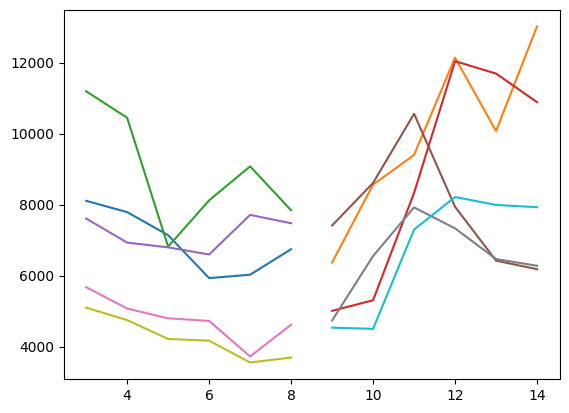

In [14]:
_, axe = plt.subplots()
year = 2010
gas_index = 3
for i in range(0, 10, 2):
    j = 3 + 6 * i
    summer = np_data[j : j+6]
    winter = np_data[j+6 : j+12]
    axe.plot(np.arange(3, 9), summer[:, gas_index])
    axe.plot(np.arange(9, 15), winter[:, gas_index])